In [218]:
import numpy as np
import matplotlib.pyplot as plt
# Graficar la funcion en 3D
def graph_3d(funcion):
    x = np.linspace(-2,2,100)
    y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    Z = funcion(X,Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X,Y,Z, cmap='viridis')  # Aquí se cambia la paleta de colores
    plt.show()

# Grafica curvas de nivel de la funcion con algunos valores de z

def graph_contour(funcion):
    x = np.linspace(-2,2,100)
    y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    Z = funcion(X,Y)
    fig, ax = plt.subplots()
    cs = ax.contour(X,Y,Z)
    ax.clabel(cs, inline=1, fontsize=10)
    plt.show()

# Función del método del gradiente ascendente para hallar el máximo de una función
def gradiente_ascendente(f, df, x0, lr, epsilon, max_iter):
    x = x0
    for i in range(max_iter):
        grad = df(x[0], x[1])
        x = x + lr*np.array(grad)
        if np.linalg.norm(grad) < epsilon:
            break
    return x

# Función del gradiente ascendente con historial de puntos
def gradiente_ascendente_plot(f, df, x0, lr, epsilon, max_iter):
    x = x0
    x_hist = [x]
    for i in range(max_iter):
        grad = df(x[0], x[1])
        x = x + lr*np.array(grad)
        x_hist.append(x)
        if np.linalg.norm(grad) < epsilon:
            break
    return x, x_hist

# Función para graficar en 3D la función y los puntos que se van moviendo
def plot_gradiente_ascendente_3d(f, df, x0, lr, epsilon, max_iter):
    x, x_hist = gradiente_ascendente_plot(f, df, x0, lr, epsilon, max_iter)
    x_hist = np.array(x_hist)
    
    x_vals = np.linspace(x_hist[:,0].min()-2, x_hist[:,0].max()+2, 400)
    y_vals = np.linspace(x_hist[:,1].min()-2, x_hist[:,1].max()+2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    ax.plot3D(x_hist[:,0], x_hist[:,1], f(x_hist[:,0], x_hist[:,1]), 'r.-')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.title('3D Gradient Ascent Path')
    plt.show()

In [219]:
# Funciones

funcion_1 = lambda x,y: (x**2 + 3*y**2) * np.exp(-x**2 - y**2)

# Derivada parcial respecto a x
def df1_x(x, y):
    return (-2*x*(x**2 + 3*y**2) + 2*x) * np.exp(-x**2 - y**2)

# Derivada parcial respecto a y
def df1_y(x, y):
    return (-2*y*(x**2 + 3*y**2) + 6*y) * np.exp(-x**2 - y**2)

funcion_2 = lambda x, y: np.sin(x) * np.sin(y) / (x * y) 

# Derivada parcial respecto a x
def df2_x(x, y):
    if x == 0 or y == 0:
        return 0
    return (y*np.cos(x)*np.sin(y) - np.sin(x)*np.sin(y)) / y**2

# Derivada parcial respecto a y
def df2_y(x, y):
    if x == 0 or y == 0:
        return 0
    return (x*np.sin(x)*np.cos(y) - np.sin(x)*np.sin(y)) / x**2


# Ejercicio:

**Por:** Andrés Felipe Yañez Villarraga
1. Construya la gráfica de las siguientes funciones:
    - $f(x,y) = (x² + 3y²)e^{-x²*-y²}$
    - $f(x,y) = \frac{sin(x)*sin(y)}{xy} $

## Función 1
#### Graficas:

$f(x,y) = (x² + 3y²)e^{-x²*-y²}$

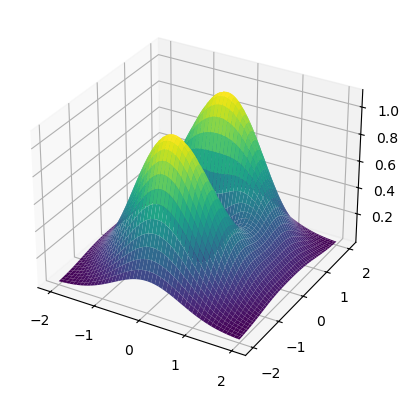

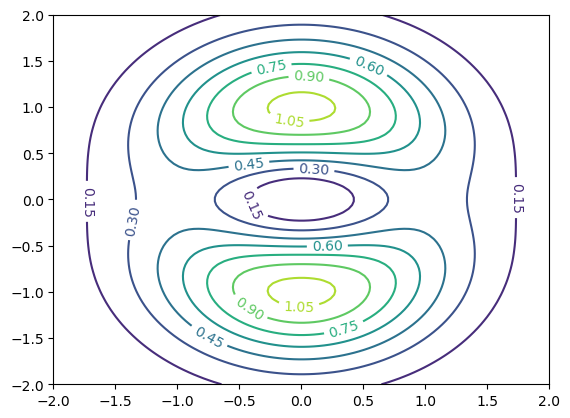

In [220]:
# Graficas
graph_3d(funcion_1)
graph_contour(funcion_1)

#### Gradiente ascendente

Utilizar el método del gradiente descendiente para hallar el máximo de las funciones de la función.

Punto máximo en x = 0.0, y = 1.0 con f(x, y) = 1.1


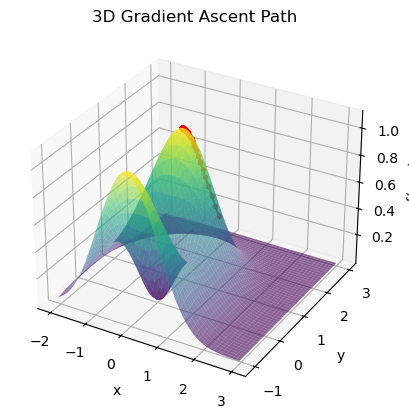

In [221]:
# Usar gradiente descendiente para funcion_1 

x0 = np.array([1, 1])
lr = 0.1
epsilon = 1e-6
max_iter = 500
gradiente = lambda x, y: [df1_x(x, y), df1_y(x, y)]

x_max, y_max = gradiente_ascendente(funcion_1, gradiente, x0, lr, epsilon, max_iter)
f_max = funcion_1(x_max, y_max)  # Evaluamos la función en el punto máximo encontrado

# Imprimimos las coordenadas del punto máximo y el valor de la función en ese punto
print(f"Punto máximo en x = {x_max.round(2)}, y = {y_max.round(2)} con f(x, y) = {f_max.round(2)}")
plot_gradiente_ascendente_3d(funcion_1, gradiente, x0, lr, epsilon, max_iter)

## Función 2


#### Grafica 
$f(x,y) = \frac{sin(x)*sin(y)}{xy} $

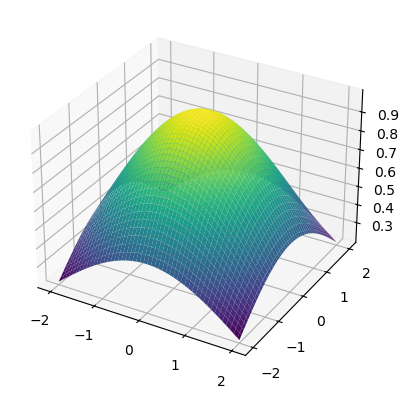

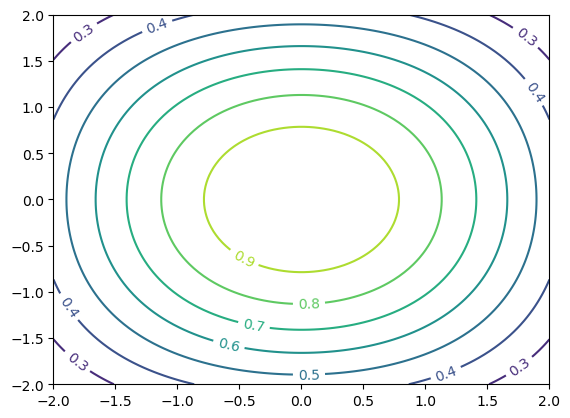

In [222]:
# Graficas
graph_3d(funcion_2)
graph_contour(funcion_2)

## Gradiente Ascendente



Punto máximo en x = 0.09, y = 0.09 con f(x, y) = 1.0


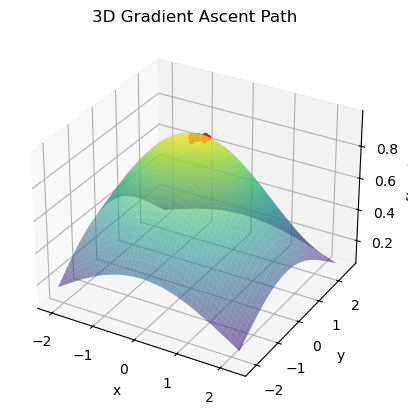

In [223]:
x0 = np.array([0.01, 0.01])  # Cambio en el punto inicial

lr = 0.1
epsilon = 1e-6
max_iter = 500
gradiente_2 = lambda x, y: [df2_x(x, y), df2_y(x, y)]

x_max, y_max = gradiente_ascendente(funcion_2, gradiente_2, x0, lr, epsilon, max_iter)
f_max = funcion_2(x_max, y_max)  # Evaluamos la función en el punto máximo encontrado

print(f"Punto máximo en x = {x_max.round(2)}, y = {y_max.round(2)} con f(x, y) = {f_max.round(2)}")
plot_gradiente_ascendente_3d(funcion_2, gradiente_2, x0, lr, epsilon, max_iter)

## Punto 3.

3. Es posible hallar el minimo de $f(x,y)=sin(x)+sin(y)$

### Respuesta

Las dos funciones son periodicas en $2\pi$ por tanto existen multiples minimos locales con el mismo valor.

##### Grafica

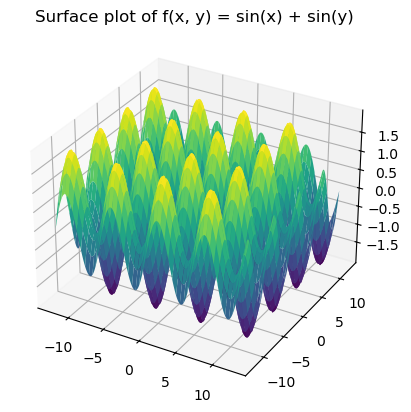

In [226]:
# Graficar la función en 3D en periodo de 0 a 4pi

# Función f(x, y)
def f(x, y):
    return np.sin(x) + np.sin(y)

# Crear una malla de puntos
x = np.linspace(-4*np.pi, 4*np.pi, 400)
y = np.linspace(-4*np.pi, 4*np.pi, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Graficar en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Surface plot of f(x, y) = sin(x) + sin(y)')
plt.show()


Por tanto el unico problema es el intervalo donde se evalue.